# Overview

***- Bu proje, California'da bulunan ev fiyatlarını tahmin etmek amacıyla geliştirilmiştir. Veri bilimi ve makine öğrenimi yöntemleri kullanılarak oluşturulan bu projenin detayları aşağıda yer almaktadır.***

#Gerekli Kütüphaneler

In [1]:
import pandas
import seaborn

# Veriyi yükleme

In [4]:
data = pandas.read_csv("housing.csv")

#Veri Bilgileri

In [8]:
#Daha iyi anlamak icin kolonları turkceye ceviriyoruz
data.columns = ["boylam", "enlem", "ort_ev_yasi", "toplam_oda", "toplam_yatak_odasi", "nufus", "hane_sayisi", "ortalama_gelir", "ev_fiyati", "denize_yakinlik"]

In [9]:
##Verinin özelliklerini öğrenme
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   boylam              20640 non-null  float64
 1   enlem               20640 non-null  float64
 2   ort_ev_yasi         20640 non-null  float64
 3   toplam_oda          20640 non-null  float64
 4   toplam_yatak_odasi  20433 non-null  float64
 5   nufus               20640 non-null  float64
 6   hane_sayisi         20640 non-null  float64
 7   ortalama_gelir      20640 non-null  float64
 8   ev_fiyati           20640 non-null  float64
 9   denize_yakinlik     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
#Column isimleri
print(data.head())

   boylam  enlem  ort_ev_yasi  toplam_oda  toplam_yatak_odasi   nufus  \
0 -122.23  37.88         41.0       880.0               129.0   322.0   
1 -122.22  37.86         21.0      7099.0              1106.0  2401.0   
2 -122.24  37.85         52.0      1467.0               190.0   496.0   
3 -122.25  37.85         52.0      1274.0               235.0   558.0   
4 -122.25  37.85         52.0      1627.0               280.0   565.0   

   hane_sayisi  ortalama_gelir  ev_fiyati denize_yakinlik  
0        126.0          8.3252   452600.0        NEAR BAY  
1       1138.0          8.3014   358500.0        NEAR BAY  
2        177.0          7.2574   352100.0        NEAR BAY  
3        219.0          5.6431   341300.0        NEAR BAY  
4        259.0          3.8462   342200.0        NEAR BAY  


In [11]:
#Verimizdeki boş değerleri kontrol etme
print(data.isna())

       boylam  enlem  ort_ev_yasi  toplam_oda  toplam_yatak_odasi  nufus  \
0       False  False        False       False               False  False   
1       False  False        False       False               False  False   
2       False  False        False       False               False  False   
3       False  False        False       False               False  False   
4       False  False        False       False               False  False   
...       ...    ...          ...         ...                 ...    ...   
20635   False  False        False       False               False  False   
20636   False  False        False       False               False  False   
20637   False  False        False       False               False  False   
20638   False  False        False       False               False  False   
20639   False  False        False       False               False  False   

       hane_sayisi  ortalama_gelir  ev_fiyati  denize_yakinlik  
0            False    

In [12]:
#Toplam boş değerleri görme
print(data.isna().sum())

boylam                  0
enlem                   0
ort_ev_yasi             0
toplam_oda              0
toplam_yatak_odasi    207
nufus                   0
hane_sayisi             0
ortalama_gelir          0
ev_fiyati               0
denize_yakinlik         0
dtype: int64


In [13]:
#Verinin miktarını görme (Satır, Sutün)
print(data.shape)

(20640, 10)


#na verinin ortalama ile doldurulması

In [15]:
data["toplam_yatak_odasi"].fillna((data["toplam_yatak_odasi"].mean()), inplace=True)

#Toplam boş değerleri görme
print(data.isna().sum())

boylam                0
enlem                 0
ort_ev_yasi           0
toplam_oda            0
toplam_yatak_odasi    0
nufus                 0
hane_sayisi           0
ortalama_gelir        0
ev_fiyati             0
denize_yakinlik       0
dtype: int64


In [16]:
#Peki veriden bir şey kaybettik mi? Hayır.
print(data.shape)

(20640, 10)


#Label encoder yüklemesi
***-denize_yakinlik adındaki verileri değiştirmemiz gerekiyor***







In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
"""
Kaç tane veri türü varsa ona göre numalandırma yapar.
Örneğin: Color   Color
         red     0
         green   1
         blue    2
         red     0
         red     0 ...
"""
data["denize_yakinlik"] = le.fit_transform(data["denize_yakinlik"])

In [18]:
#Encoderimiz kaç farklı tanımlama yapmış. (0, 1, 2, 3)
print(data["denize_yakinlik"].unique)

<bound method Series.unique of 0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: denize_yakinlik, Length: 20640, dtype: int64>


In [19]:
#encoderdan sonra ilk 5 satır kontrolü
print(data.head())

   boylam  enlem  ort_ev_yasi  toplam_oda  toplam_yatak_odasi   nufus  \
0 -122.23  37.88         41.0       880.0               129.0   322.0   
1 -122.22  37.86         21.0      7099.0              1106.0  2401.0   
2 -122.24  37.85         52.0      1467.0               190.0   496.0   
3 -122.25  37.85         52.0      1274.0               235.0   558.0   
4 -122.25  37.85         52.0      1627.0               280.0   565.0   

   hane_sayisi  ortalama_gelir  ev_fiyati  denize_yakinlik  
0        126.0          8.3252   452600.0                3  
1       1138.0          8.3014   358500.0                3  
2        177.0          7.2574   352100.0                3  
3        219.0          5.6431   341300.0                3  
4        259.0          3.8462   342200.0                3  


#Veri görselleştirme (heat map)
***- Bu tabloda bağımlı bağımsız değişkenleri görüyoruz. 1 en alakalı bu sayı azaldıkça bağımlılık düşüyor. Ev fiyat tahminimizi bu veriler üzerinden yapacağız.***




<Axes: >

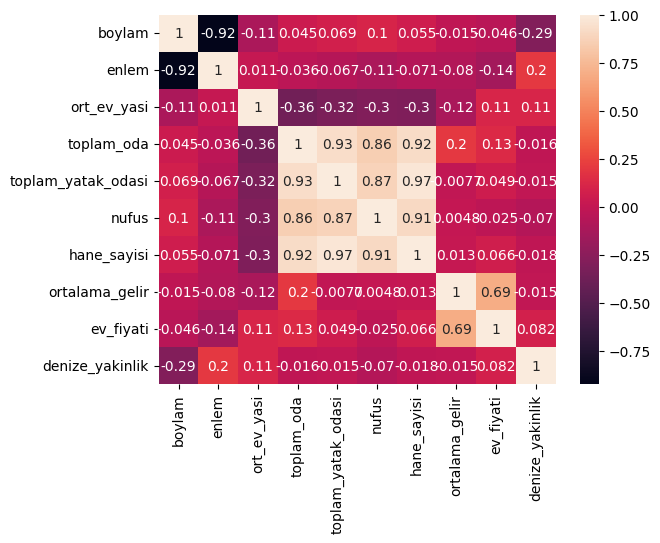

In [20]:
cor = data.corr()
seaborn.heatmap(cor, annot=True)

#Veriyi Eğitme

In [21]:
#Veriyi x ve y olarak ayırma
x = data.drop(["ev_fiyati"], axis=1) #Burda bağımlı değişken olan ev_fiyati'nı çıkartıyoruz. Axis=1'de bunu kolon olarak düşür demek
y = data.iloc[:, -2] #Ev fiyatlarını aldık
print(x.head())
print(y.head())

   boylam  enlem  ort_ev_yasi  toplam_oda  toplam_yatak_odasi   nufus  \
0 -122.23  37.88         41.0       880.0               129.0   322.0   
1 -122.22  37.86         21.0      7099.0              1106.0  2401.0   
2 -122.24  37.85         52.0      1467.0               190.0   496.0   
3 -122.25  37.85         52.0      1274.0               235.0   558.0   
4 -122.25  37.85         52.0      1627.0               280.0   565.0   

   hane_sayisi  ortalama_gelir  denize_yakinlik  
0        126.0          8.3252                3  
1       1138.0          8.3014                3  
2        177.0          7.2574                3  
3        219.0          5.6431                3  
4        259.0          3.8462                3  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: ev_fiyati, dtype: float64


In [23]:
#Veriyi train ve test olarak ayırma
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #Verimizin %30'unu teste verdik

In [24]:
#Test ve trainlerin veri adeti
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14448, 9)
(14448,)
(6192, 9)
(6192,)


In [25]:
#Veriyi sıkıştırma ve Transform etme
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
print(x_train)

[[ 0.57828127 -0.72860799  1.45761784 ...  1.02235859 -0.09108883
  -0.81927202]
 [-1.31501982  1.01789636  1.85740338 ... -0.32660682  0.23060741
   1.27921081]
 [-0.73054429  1.69865746 -1.02105248 ... -0.43726414 -1.27756888
  -0.11977774]
 ...
 [-0.51573704 -0.42813412  0.01838991 ...  6.13103815 -0.59167345
   1.97870508]
 [ 2.45659582 -0.36710037 -1.50079512 ... -0.04732883 -1.13027054
  -0.11977774]
 [-0.87541429  1.10240463  1.85740338 ... -0.47151522 -0.13651583
  -0.11977774]]


#Linar regrasyon ile modeli eğitme

In [26]:
#Linar regrasyon ile modeli eğitme
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [27]:
#Tahmin alma
predict = lr.predict(x_test)
print(r2_score(predict, y_test)) # %44 doğruluk ile çalıştı.

0.44085173358632346


#Random forest ile modeli eğitme

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
#Tahmin alma
predict2 = rfr.predict(x_test)
print(r2_score(predict2, y_test)) # %63 doğruluk ile çalıştı.

0.635613821362764
